In [285]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [218]:
loans_df = pd.read_csv('/Users/toddhendricks/Downloads/Post-COVID Retail Financing_ National - West Coast.csv')

In [219]:
profile = ProfileReport(loans_df, title="Loan Transactions")

In [220]:
loans_df.columns

Index(['Address', 'City', 'State', 'Region', 'Asset Type', 'Last Mortgage',
       'Mortgage Amount', ' Building\nArea ', 'Lender', 'Lender\nType',
       'Reported Owner'],
      dtype='object')

In [221]:
#Clean Mortgage Amount
loans_df['Mortgage Amount'] = (
    loans_df['Mortgage Amount'].str.replace('$','')
    .str.replace(',','')
    .str.strip()
    .str.extract('(\d+)', expand=False)
#     .fillna((loans_df['Mortgage Amount'].median()), inplace=True)
)

In [222]:
loans_df['Mortgage Amount'] = pd.to_numeric(loans_df['Mortgage Amount'])

In [223]:
loans_df['Mortgage Amount'].sum()

458846997230.0

In [224]:
loans_by_lender = loans_df.groupby(by='Lender\nType').agg({'Mortgage Amount': 'sum'})

In [292]:
loan_lender_count = loans_df.groupby(by='Lender\nType')['Mortgage Amount'].count()

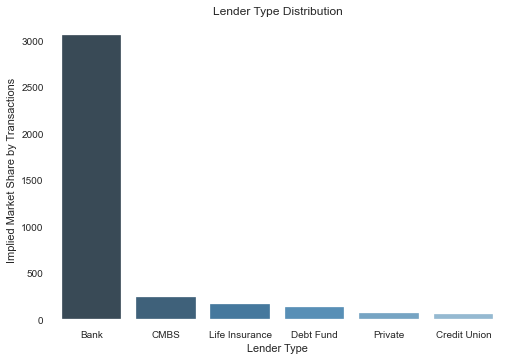

In [306]:
x = loan_lender_count.sort_values(ascending=False)
players = ['Bank','CMBS','Life Insurance', 'Debt Fund', 'Private','Credit Union']
totals = [3065, 235,165, 128,63,53]
sns.barplot(players,totals, palette="Blues_d")
plt.title('Lender Type Distribution')
plt.xlabel('Lender Type')
plt.ylabel('Implied Market Share by Transactions')
plt.savefig('transactions')

In [225]:
loans_by_lender['%'] = loans_by_lender.apply(lambda x:  100*x / x.sum())

In [226]:
loans_by_lender = loans_by_lender.astype(int)

In [227]:
loans_by_lender['%'].astype(float)
loans_by_lender

,Mortgage Amount,%
Lender Type,,
?,83110000,0
Automotive,1088029038,0
Bank,183893349488,41
Bonds,3809210000,0
CMBS,236169768378,53
Credit Union,468057449,0
Debt Fund,5480472586,1
Government,412590686,0
Life Insurance,5344491818,1


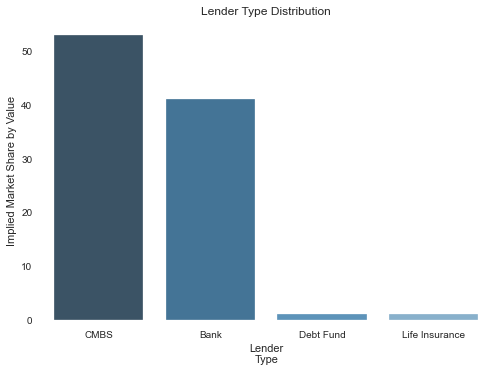

In [305]:
real_values = loans_by_lender[loans_by_lender['%'] > 0].sort_values(by='%',ascending=False)
sns.barplot(real_values.index,real_values['%'].values, palette="Blues_d")
plt.title('Lender Type Distribution')
plt.ylabel('Implied Market Share by Value')
plt.savefig('value')

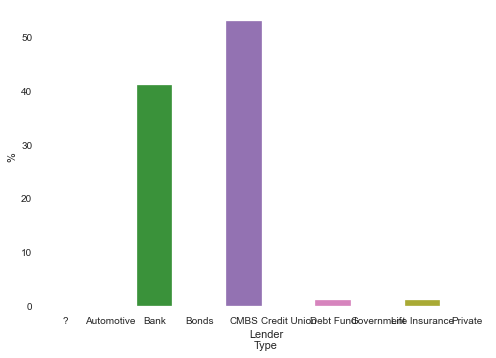

In [229]:
sns.barplot(x=loans_by_lender.index,y=loans_by_lender['%'])

In [230]:
loans_by_lender.groupby(by=loans_by_lender.index).get_group('CMBS')

,Mortgage Amount,%
Lender Type,,
CMBS,236169768378,53


In [231]:
cmbs = loans_df[loans_df['Lender\nType'] == 'CMBS']

In [232]:
cmbs['Mortgage Amount'].dropna().astype(int)

17       715000000
46       715000000
49        29345000
89      5095100000
91      5095100000
           ...    
3976     715000000
4015     715000000
4048     715000000
4049     715000000
4087     715000000
Name: Mortgage Amount, Length: 235, dtype: int64

In [233]:
cmbs['Mortgage Amount'] = cmbs['Mortgage Amount'].dropna().astype(int)
cmbs.sort_values(by=['Mortgage Amount','Lender'])

/Users/toddhendricks/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Address,City,State,Region,Asset Type,Last Mortgage,Mortgage Amount,Building\nArea,Lender,Lender\nType,Reported Owner
2512,409 N Mattis Ave,Champaign,IL,Midwest,Retail,14-Jul-20,160000.00,NaN,Deutsche Bank Trust Co Americas,CMBS,Npc International Inc
3966,974 Elmont Rd,Sullivan,MO,South,Vacant Land,29-Jul-20,464750.00,NaN,Column Fin'l Inc,CMBS,Arc Dg Svn Mo001 Llc
2142,3150 Vista Blvd,Sparks,NV,West,Retail,27-Apr-20,7642650.00,"23,074",Deutsche Bank Trust Co Americas,CMBS,Peninsula Sparks Llc
3245,635 Booth St,Reno,NV,West,Retail,27-Apr-20,7642650.00,"48,071",Deutsche Bank Trust Co Americas,CMBS,"Jw & Ll Investments Llc, Sun Property Investme..."
309,11055 N Alpine Hwy,Highland,UT,West,Retail,16-Jul-20,7800000.00,"7,468",Wells Fargo Bank N 2015-C20 (Ce),CMBS,Mng Highland I Llc
...,...,...,...,...,...,...,...,...,...,...,...
2830,5031 Linden Ave,Dayton,OH,Midwest,Retail,1-May-20,7500000000.00,"9,650",Deutsche Bank Trust Co Americas,CMBS,Floyd E Gillott
987,1540 E Highway 30,Gonzales,LA,South,Retail,3-Aug-20,nan,"2,930",Column Fin'l Inc,CMBS,Arg Im12pkslb001 Llc
1427,2002 Alma Ave,Pueblo,CO,81004,Retail,31-Jul-20,nan,"15,105",Column Fin'l Inc,CMBS,A R G Ccpblco01 Llc
3342,6720 Nelson Rd,Lake Charles,LA,South,Retail,3-Aug-20,nan,"2,512",Column Fin'l Inc,CMBS,Arg Im12pkslb001 Llc


In [234]:
cmbs['Lender']

17                               Column
46                               Column
49               Goldman Sachs Bank Usa
89      Deutsche Bank Trust Co Americas
91      Deutsche Bank Trust Co Americas
                     ...               
3976                             Column
4015                             Column
4048                             Column
4049                             Column
4087                             Column
Name: Lender, Length: 239, dtype: object

In [235]:
loans_df['Last Mortgage'] = pd.to_datetime(loans_df['Last Mortgage'])

In [236]:
loans_df['Last Mortgage']

0      2020-05-19
1      2020-04-21
2      2020-03-16
3      2020-03-13
4      2020-03-20
          ...    
4101   2020-04-06
4102   2020-03-03
4103   2020-03-06
4104   2020-03-06
4105   2020-04-20
Name: Last Mortgage, Length: 4106, dtype: datetime64[ns]

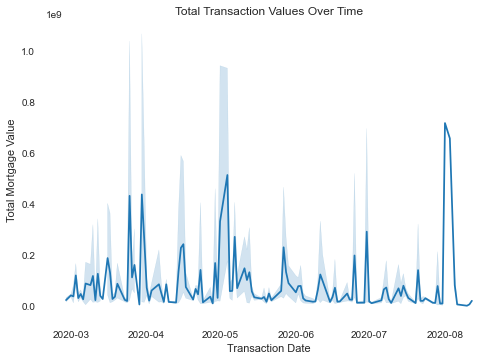

In [310]:
sns.lineplot(x=loans_df['Last Mortgage'],y=loans_df['Mortgage Amount'].dropna().astype(int))
plt.xlabel('Transaction Date')
plt.ylabel('Total Mortgage Value')
plt.title('Total Transaction Values Over Time')
plt.savefig('time')

In [311]:
loans_calendar = loans_df.set_index(loans_df['Last Mortgage'])

In [313]:
monthly_volume_count = loans_calendar.resample('M').count()

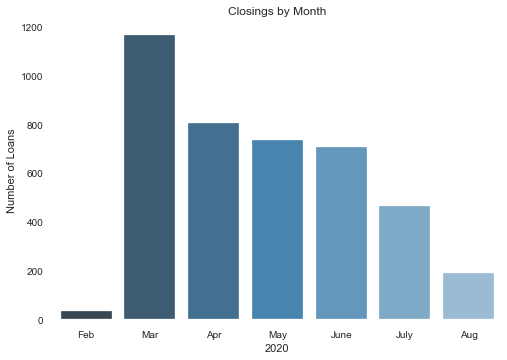

In [335]:
monthly_volume_count['Last Mortgage']
months = ['Feb','Mar', 'Apr', 'May', 'June', 'July', 'Aug']
sns.barplot(x=months, y=monthly_volume_count['Last Mortgage'],palette="Blues_d")
plt.ylabel('Number of Loans')
plt.xlabel('2020')
plt.title('Closings by Month')
plt.savefig('total_closed')

In [320]:
monthly_volume_value = loans_calendar.resample('M').sum()

In [323]:
monthly_volume_value['%'] = monthly_volume_value['Mortgage Amount'] / monthly_volume_value['Mortgage Amount'].sum() 

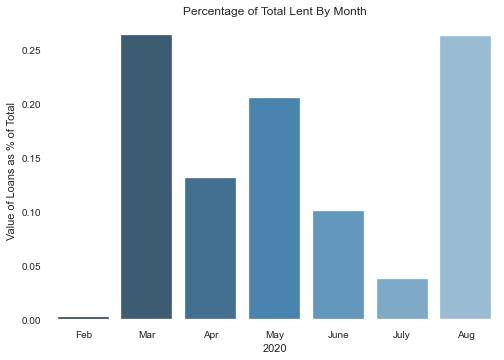

In [328]:
sns.barplot(months, monthly_volume_value['%'],palette="Blues_d")
plt.ylabel('Value of Loans as % of Total')
plt.xlabel('2020')
plt.title('Percentage of Total Lent By Month')
plt.savefig('total_lent')

In [257]:
monthly_volume['avg'] = loans_calendar.resample('M').mean()

In [259]:
monthly_volume['std'] = loans_calendar.resample('M').std()

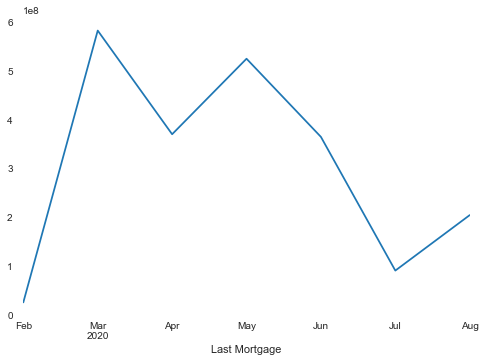

In [265]:
monthly_volume['std'].plot()

In [268]:
loans_df['Last Mortgage'].max()

Timestamp('2020-08-12 00:00:00')

In [334]:
loans_df.nlargest(20,'Mortgage Amount')

,Address,City,State,Region,Asset Type,Last Mortgage,Mortgage Amount,Building\nArea,Lender,Lender\nType,Reported Owner
217,1070 Jacoby Rd,Copley,OH,Midwest,Retail,2020-03-30,7500000000.00,"29,393",Deutsche Bank Trust Co Americas,CMBS,Equinox Capital Group Llc
457,11909 Grafton Rd,Grafton,OH,Midwest,Retail,2020-03-25,7500000000.00,"8,208",Deutsche Bank Trust Co Americas,CMBS,"William P Lilley, Jon P Lilley"
1314,1881 Canton Rd,Akron,OH,Midwest,Retail,2020-03-30,7500000000.00,"8,512",Deutsche Bank Trust Co America (Ce),CMBS,Canton Road Garden Center Inc
2352,3644 Liberty Ave,Vermilion,OH,Midwest,Retail,2020-03-25,7500000000.00,"1,344",Deutsche Bank Trust Co Americas,CMBS,Richard J Nardecchia
2830,5031 Linden Ave,Dayton,OH,Midwest,Retail,2020-05-01,7500000000.00,"9,650",Deutsche Bank Trust Co Americas,CMBS,Floyd E Gillott
89,101 Park South Ct,Nashville,TN,South,Retail,2020-04-16,5095100000.00,NaN,Deutsche Bank Trust Co Americas,CMBS,"Dale Broadrick, Cheryl Broadrick"
91,101 S Virginia Ave,Carthage,MO,South,Retail,2020-03-16,5095100000.00,"2,319",Deutsche Bank Trust Co Americas,CMBS,Holly Stump
415,11642 Ne Halsey St,Portland,OR,West,Retail,2020-05-04,5095100000.00,"2,835",Deutsche Bank Trust Co Americas,CMBS,Hsiao Chon Mar
1149,171 Kingston Dr,Saint Louis,MO,South,Retail,2020-03-12,5095100000.00,"16,688",Deutsche Bank Trust Co Americas,CMBS,My People Feed
1828,2550 E Morris Blvd,Morristown,TN,South,Retail,2020-06-25,5095100000.00,"343,005",Deutsche Bank Trust Co Americas,CMBS,Time Equities Inc


In [358]:
cmbs['Mortgage Amount'].mean()

1004977737.7787234

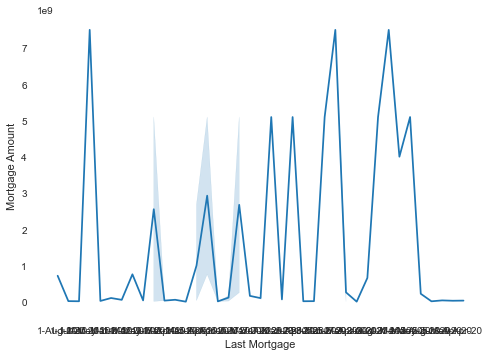

In [337]:
sns.lineplot(x=cmbs['Last Mortgage'], y=cmbs['Mortgage Amount'])

In [338]:
banks = loans_df[loans_df['Lender\nType'] == 'Bank']

In [359]:
banks['Mortgage Amount'].mean()

59997830.17553018

In [347]:
reduced = loans_df[['Last Mortgage','Mortgage Amount', 'Lender\nType']]

In [351]:
date = reduced['Last Mortgage']
amt = reduced['Mortgage Amount']
kind = reduced['Lender\nType']

In [362]:
loans_df['month_year'] = loans_df['Last Mortgage'].dt.to_period('M')

In [383]:
x = loans_df.groupby(['month_year','Lender\nType'])['Mortgage Amount'].std()

In [390]:
x_newx = x.reset_index()

In [391]:
x_banks = x_newx[x_newx['Lender\nType'] == 'Bank']

In [394]:
x_banks

,month_year,Lender\nType,Mortgage Amount
1,2020-02,Bank,27352548.94
6,2020-03,Bank,204462567.40
15,2020-04,Bank,229413120.80
25,2020-05,Bank,276254657.93
34,2020-06,Bank,174646523.38
41,2020-07,Bank,89244720.11
47,2020-08,Bank,25405522.84


In [395]:
x_cmbs =  x_newx[x_newx['Lender\nType'] == 'CMBS']

In [401]:
std_values_over_time = x_cmbs['Mortgage Amount'].values / 1000000

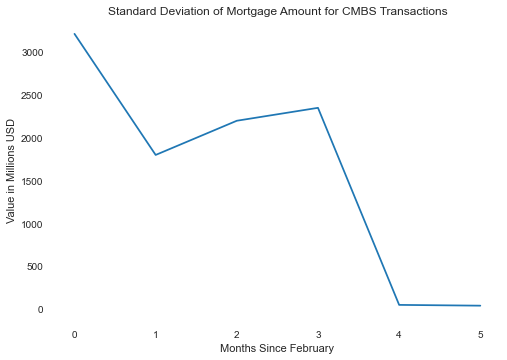

In [407]:
plt.plot(std_values_over_time)
plt.plot()
plt.ylabel('Value in Millions USD')
plt.xlabel('Months Since February')
plt.title('Standard Deviation of Mortgage Amount for CMBS Transactions')
plt.savefig('std_cmbs')